- <span style = 'font-size:1.2em;line-height:1.5em'>이 실습 파일은 Teddy Lee님의 TeddyNote 웹페이지를 참고하여 제작되었습니다.</span>
- <span style = 'font-size:1.2em;line-height:1.5em'>[Link]: https://teddylee777.github.io/pytorch/pytorch-image-transforms/</span>

# Data Augmentation(데이터 증강) 이란?

- <span style = 'font-size:1.2em;line-height:1.5em'>기존 데이터에서 약간 변형을 가하여 training dataset을 늘리는 technique</span>
- <span style = 'font-size:1.2em;line-height:1.5em'>다양한 data에서 augmentation기법이 사용됩니다. 특히, image data를 활용한 분야에서는 상당히 많은 연구 (or project)가 augmentation기법을 많이 사용합니다.</span>
- <span style = 'font-size:1.2em;line-height:1.5em'>Image Data에는 다음과 같은 augmentation 기법들이 있습니다.</span>
    - <span style = 'font-size:1.1em;line-height:1.5em'>Flip(Horizontal, Vertical)</span>
    - <span style = 'font-size:1.1em;line-height:1.5em'>Random Crop</span>
    - <span style = 'font-size:1.1em;line-height:1.5em'>Shear</span>
    - <span style = 'font-size:1.1em;line-height:1.5em'>Rotate</span>
    - <span style = 'font-size:1.1em;line-height:1.5em'>Zoom</span>
    - <span style = 'font-size:1.1em;line-height:1.5em'>Blur</span>
    - <span style = 'font-size:1.1em;line-height:1.5em'>...</span>
    
- <span style = 'font-size:1.2em;line-height:1.5em'>torchvision의 transform을 활용하면 image augmentation을 손쉽게 활용할 수 있습니다.</span>
    - <span style = 'font-size:1.1em;line-height:1.5em'><b>Document: </b>https://pytorch.org/vision/stable/transforms.html</span>
- <span style = 'font-size:1.2em;line-height:1.5em'>이에 대한 실습을 진행해보도록 하죠.</span>

## 일단 데이터부터 받아봅시다. 
- <span style = 'font-size:1.2em;line-height:1.5em'>Kaggle에 공개된 "cats and dogs" 데이터셋을 활용합니다.</span>
- <span style = 'font-size:1.2em;line-height:1.5em'>필요한 코드는 download.py에 넣어두었으니 가져다 쓰기만 합시다.</span>

In [5]:
import os
from download import download_dataset

# 개, 고양이 데이터셋 다운로드를 받습니다.
# 받은 데이터는 tmp/PetImages 폴더 안에 저장됩니다.
# 중간에 Truncated 된 이미지가 존재합니다.

# 데이터가 없으면 아래 코드를 주석처리해제하고 실행하세요.
# download_dataset('https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip', 
#                  'PetImages')

## DataLoader를 사용하여 자동으로 mini-batch를 생성하려면...

- <span style = 'font-size:1.2em;line-height:1.5em'>Custom Dataset을 만들고</span>
    - <span style = 'font-size:1.1em;line-height:1.5em'>여기선 `torchvision.datasets.ImageFolder`를 사용합니다.</span>
- <span style = 'font-size:1.2em;line-height:1.5em'>DataLoader에 위의 custom dataset을 전달합니다.</span>


- <span style = 'font-size:1.2em;line-height:1.5em'>이에 대한 자세한 내용은 다음 실습파일에서 자세히 다루도록 하겠습니다.</span>

In [6]:
import torch
import numpy as np

from torchvision.datasets.folder import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

torch.manual_seed(42)


In [7]:
IMAGE_SIZE=224

In [22]:
# 이미지 폴더로부터 데이터를 로드합니다.
original_dataset = ImageFolder(root='tmp/PetImages',                            # 이미지가 들어있는 root 경로를 지정합니다.
                               transform=transforms.Compose([                   # Resize 후 정규화(0~1)를 수행합니다.
#                                    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), # 개와 고양이 사진 파일의 크기가 다르므로, Resize로 맞춰줍니다.
                                   transforms.ToTensor()                        # PIL image data를 pytorch tensor로 변환합니다.
                               ]))

# DataLoader를 생성한다.
original_loader = DataLoader(original_dataset, # 이전에 생성한 original_dataset를 로드 합니다.
                             batch_size=1,     # 배치사이즈
                             shuffle=False,   # 셔플 여부
                             num_workers=1)

- <span style = 'font-size:1.2em;line-height:1.5em'>mini-batch 한개만 추출해서 봅시다.</span>

In [23]:
original_images, labels = next(iter(original_loader))

# 이미지의 shape을 확인합니다. 224 X 224 RGB 이미지 임을 확인합니다. 
# (batch_size, channel, height, width)
print(original_images.shape)

torch.Size([1, 3, 375, 500])


- <span style = 'font-size:1.2em;line-height:1.5em'>single data를 하나 추출해서 시각화해서 봅시다.</span>

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
tmp = np.array(original_images[0].permute(1,2,0))

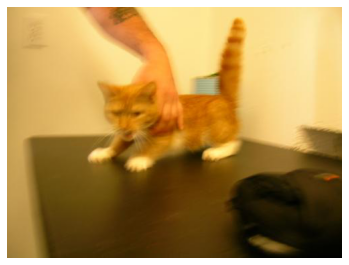

In [26]:
plt.figure(figsize=(6, 6))
# permute로 이미지의 shape를 다음과 같이 변경합니다
# (height, width, channel)
plt.imshow(tmp)
plt.grid(False)
plt.axis('off')
plt.show()

In [27]:
tmp.shape

(375, 500, 3)

## 실제로 변환하면서 결과를 관찰해봅시다.

### torchvision.transforms.Compose(): 여러개의 이미지 변환과정을 연속해서 수행

- <span style = 'font-size:1.2em;line-height:1.5em'>다음과 같이 사용합니다.</span>

```python
transforms.Compose([transform1, transform2, ...])
```

### transform.ToTensor()
- <span style = 'font-size:1.2em;line-height:1.5em'>Image형태의 data를 Pytorch Tensor형태로 바뀝니다.</span>
- <span style = 'font-size:1.2em;line-height:1.5em'>(Image 데이터를 사용하여 모델링할 때, 거의 기본으로 사용된다고 생각하셔도 됩니다.)</span>

### transform.Resize()
- <span style = 'font-size:1.2em;line-height:1.5em'>image의 크기를 조절함</span>
- <span style = 'font-size:1.2em;line-height:1.5em'>image data는 크기가 제각각입니다. 이 상태에서 모델에 넣을 수도 없고, mini-batch생성도 안됩니다.</span>
- <span style = 'font-size:1.2em;line-height:1.5em'>이러한 현상을 방지하기 위해 이미지의 크기를 일괄되게 조절합니다.</span>

In [42]:
original_dataset = ImageFolder(root='tmp/PetImages',           # 이미지가 들어있는 root 경로를 지정합니다.
                               transform=transforms.Compose([  
                                   transforms.ToTensor()       # PIL image data를 pytorch tensor로 변환합니다.
                               ]))


#### 이미지 크기가 달라서 mini-batch tensor 생성이...

In [56]:
original_loader = DataLoader(original_dataset, # 이전에 생성한 original_dataset를 로드 합니다.
                             batch_size=16,     # 배치사이즈
                             shuffle=False,   # 셔플 여부
                             num_workers=1)
iterator = iter(original_loader)
original_images, labels = next(iterator)

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\torch\utils\data\_utils\worker.py", line 302, in _worker_loop
    data = fetcher.fetch(index)
  File "C:\Users\user\anaconda3\lib\site-packages\torch\utils\data\_utils\fetch.py", line 61, in fetch
    return self.collate_fn(data)
  File "C:\Users\user\anaconda3\lib\site-packages\torch\utils\data\_utils\collate.py", line 265, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "C:\Users\user\anaconda3\lib\site-packages\torch\utils\data\_utils\collate.py", line 143, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "C:\Users\user\anaconda3\lib\site-packages\torch\utils\data\_utils\collate.py", line 143, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "C:\Users\user\anaconda3\lib\site-packages\torch\utils\data\_utils\collate.py", line 120, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
  File "C:\Users\user\anaconda3\lib\site-packages\torch\utils\data\_utils\collate.py", line 162, in collate_tensor_fn
    out = elem.new(storage).resize_(len(batch), *list(elem.size()))
RuntimeError: Trying to resize storage that is not resizable


#### 이미지 크기가 실제로 다른지 봅시다.

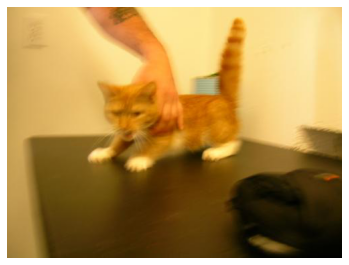

In [58]:
# mini-batch 생성기 (data_loader) 만들기, (batch_size=1)
original_loader = DataLoader(original_dataset, # 이전에 생성한 original_dataset를 로드 합니다.
                             batch_size=1,     # 배치사이즈
                             shuffle=False,   # 셔플 여부
                             num_workers=1)


# mini-batch 데이터 생성하기
iterator = iter(original_loader)
original_images, labels = next(iterator)

# mini-batch의 0번째 데이터를 추출하고 image show하기
tmp = original_images[0].permute(1,2,0) #image를 그려주기 위해 형태 변환하기. (height, width, channel)로
tmp = np.array(tmp) # numpy array 타입으로 바꾸기
plt.figure(figsize=(6, 6))
# permute로 이미지의 shape를 다음과 같이 변경합니다
# (height, width, channel)
plt.imshow(tmp)
plt.grid(False)
plt.axis('off')
plt.show()

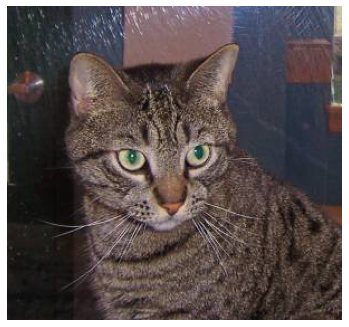

In [59]:
original_images, labels = next(iterator)

# mini-batch의 0번째 데이터를 추출하고 image show하기
tmp = original_images[0].permute(1,2,0) #image를 그려주기 위해 형태 변환하기. (height, width, channel)로
tmp = np.array(tmp) # numpy array 타입으로 바꾸기
plt.figure(figsize=(6, 6))
# permute로 이미지의 shape를 다음과 같이 변경합니다
# (height, width, channel)
plt.imshow(tmp)
plt.grid(False)
plt.axis('off')
plt.show()

#### Resize()를 적용하면?

In [64]:
IMAGE_SIZE=224
transform_dataset = ImageFolder(root='tmp/PetImages',           # image들이 들어있는 root 경로를 지정합니다.
                                transform=transforms.Compose([ 
                                    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), # image size를 224*224로 변환
                                    transforms.ToTensor()       # PIL image data를 pytorch tensor로 변환합니다.
                                ]))
transform_loader = DataLoader(transform_dataset, batch_size=2, shuffle=False)

for i, (original_images, labels) in enumerate(transform_loader):
    if i == 0:
        break

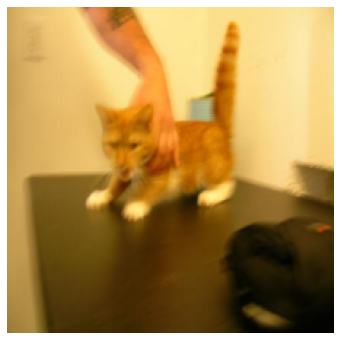

In [66]:
# mini-batch의 0번째 데이터를 추출하고 image show하기
tmp = original_images[0].permute(1,2,0) #image를 그려주기 위해 형태 변환하기. (height, width, channel)로
tmp = np.array(tmp) # numpy array 타입으로 바꾸기
plt.figure(figsize=(6, 6))
# permute로 이미지의 shape를 다음과 같이 변경합니다
# (height, width, channel)
plt.imshow(tmp)
plt.grid(False)
plt.axis('off')
plt.show()

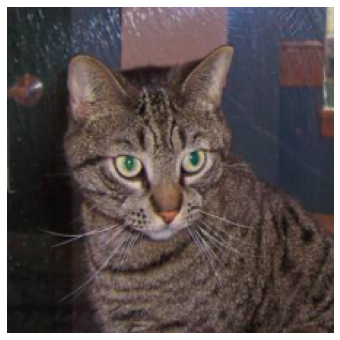

In [67]:
# mini-batch의 1번째 데이터를 추출하고 image show하기
tmp = original_images[1].permute(1,2,0) #image를 그려주기 위해 형태 변환하기. (height, width, channel)로
tmp = np.array(tmp) # numpy array 타입으로 바꾸기
plt.figure(figsize=(6, 6))
# permute로 이미지의 shape를 다음과 같이 변경합니다
# (height, width, channel)
plt.imshow(tmp)
plt.grid(False)
plt.axis('off')
plt.show()

### transform 방식을 받으면 dataset, dataloader를 생성하고, 몇몇 sample의 image도 그려주는 함수를 만듭시다

In [88]:
def show_image_sample(transform_method):
    original_dset = ImageFolder(root='tmp/PetImages', 
                                transform = transforms.Compose([
                                    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                    transforms.ToTensor()
                                ]))
    
    transform_dset = ImageFolder(root = 'tmp/PetImages', 
                                 transform=transform_method)
    
    original_loader = DataLoader(original_dset, batch_size=4, shuffle=False)
    transform_loader = DataLoader(transform_dset, batch_size=4, shuffle=False)
    
    for i, (original_images, original_labels) in enumerate(original_loader):
        if i == 0:
            break
            
    for i, (transform_images, transform_labels) in enumerate(transform_loader):
        if i == 0:
            break
            
    fig, axes = plt.subplots(3,2, figsize=(8,10))
#     fig.set_size_inches(4,6)
    
    for idx in range(3):
        axes[idx,0].imshow(original_images[idx].permute(1,2,0))
        axes[idx,0].set_axis_off()
        axes[idx,0].set_title('Original')
        axes[idx,1].imshow(transform_images[idx].permute(1,2,0))
        axes[idx,1].set_axis_off()
        axes[idx,1].set_title('Transformed')

### ColorJitter()

- <span style = 'font-size:1.2em;line-height:1.5em'>밝기, 대비, 채도, 색상 조절</span>

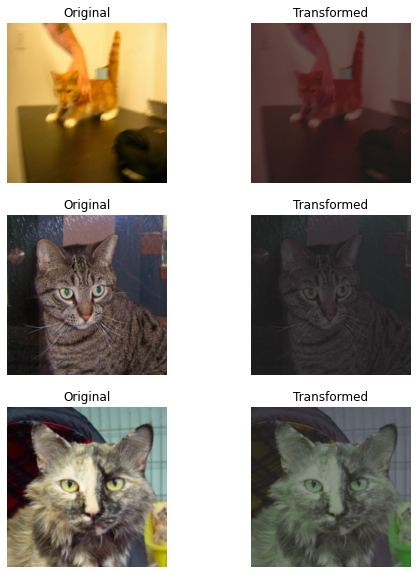

In [89]:
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),              
    # ColorJitter 적용
    transforms.ColorJitter(brightness=(0.5, 0.9), 
                           contrast=(0.4, 0.8), 
                           saturation=(0.7, 0.9),
                           hue=(-0.2, 0.2),
                          ),
    transforms.ToTensor()
])

show_image_sample(image_transform)

### RandomHoizontalFlip

- <span style = 'font-size:1.2em;line-height:1.5em'>수평 방향으로 뒤집는 확률 조절</span>

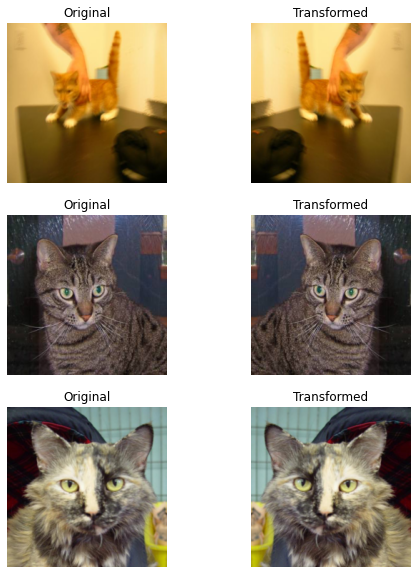

In [90]:
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),              
    # RandomHorizontalFlip 적용
    transforms.RandomHorizontalFlip(p=0.8),
    transforms.ToTensor()
])

show_image_sample(image_transform)

### GaussianBlur()

- <span style = 'font-size:1.2em;line-height:1.5em'>Blur처리하기</span>

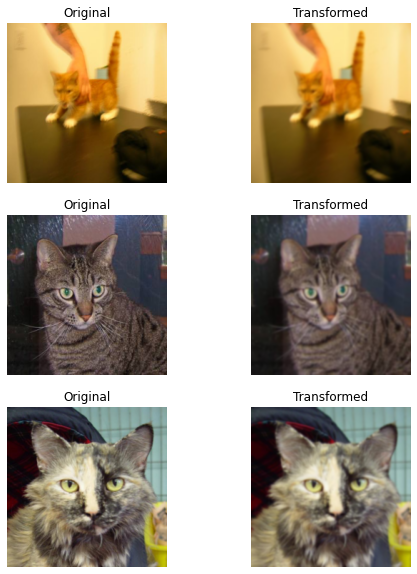

In [91]:
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),              
    # GaussianBlur 적용
    transforms.GaussianBlur(kernel_size=(19, 19), sigma=(1.0, 2.0)),
    transforms.ToTensor()
])

show_image_sample(image_transform)

### RandomRotation()

- <span style = 'font-size:1.2em;line-height:1.5em'>랜덤하게 이미지 각도 조절</span>

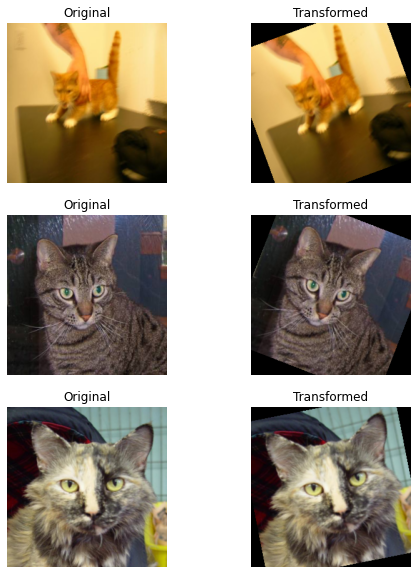

In [92]:
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),              
    # RandomRotation 적용
    transforms.RandomRotation(degrees=(-30, 30), interpolation=transforms.InterpolationMode.BILINEAR, fill=0),
    transforms.ToTensor()
])

show_image_sample(image_transform)

### Pad()

- <span style = 'font-size:1.2em;line-height:1.5em'>패딩값 추가</span>

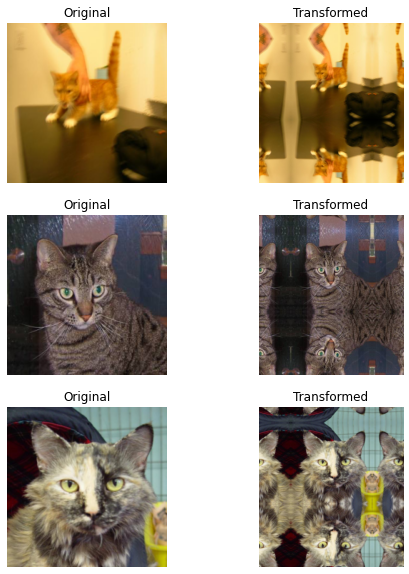

In [94]:
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),              
    # Pad 적용
    transforms.Pad(padding=(100, 50, 100, 200), fill=255, padding_mode='symmetric'),
    transforms.ToTensor()
])

show_image_sample(image_transform)

### RandomAdjustSharpness()

- <span style = 'font-size:1.2em;line-height:1.5em'>선명도 조절</span>

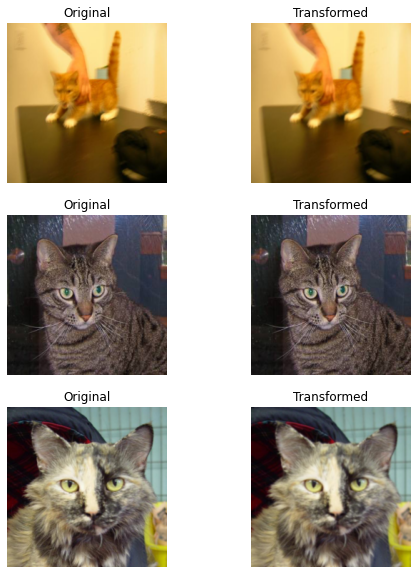

In [101]:
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),              
    # RandomAdjustSharpness 적용
    transforms.RandomAdjustSharpness(sharpness_factor=0.1, p=0.9),
    transforms.ToTensor()
])

show_image_sample(image_transform)

### AutoAugment()

- <span style = 'font-size:1.2em;line-height:1.5em'>데이터로부터 학습 증강 전략에 기반한 자동증강 데이터 증강 방법.(</span>

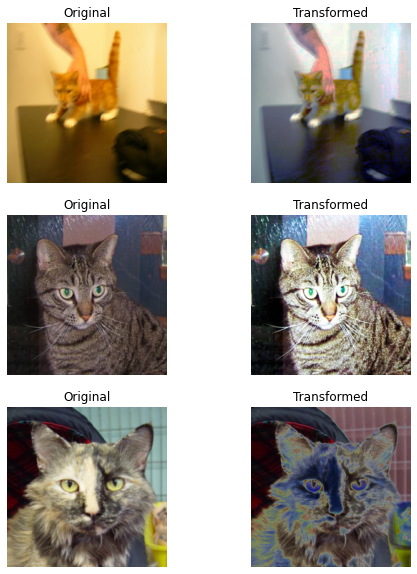

In [96]:
image_transform = transforms.Compose([
    transforms.Resize((256, 256)),              
    # AutoAugment 적용
    transforms.AutoAugment(policy=transforms.autoaugment.AutoAugmentPolicy.IMAGENET, 
                           interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.ToTensor()
])

show_image_sample(image_transform)